In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Cells:	97	161	22	40
Median of genes:
3913.0
2790.0
3331.5
2932.0
Median of isoforms:
4963.0
3272.0
4050.0
3420.5


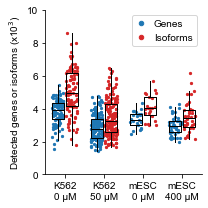

In [4]:
info = pd.read_excel("../../1_NanoNASCseq/data/NanoNASCseq_summary_selected.xls")

runs1 = ["20220719_K562R1", "20220719_K562R2", "20220719_K562R3", "20220719_K562R4", "20220729_K562R1", "20220729_K562R2"]
runs2 = ["20220818_mESCR1", "20220818_mESCR2", "20220818_mESCR3"]

d = info[[x in runs1 for x in info["Run"]]]
d1 = d[(d["Strain"] == "K562") & (d["s4U"] == 0) & (d["Time"] == 3) & (d["ActD"].isna()) & (d["UMIs"] >= 5000)]
d2 = d[(d["Strain"] == "K562") & (d["s4U"] == 50) & (d["Time"] == 3) & (d["ActD"].isna()) & (d["UMIs"] >= 5000)]

d = info[[x in runs2 for x in info["Run"]]]
d3 = d[(d["Strain"] == "mESC") & (d["s4U"] == 0) & (d["Time"] == 3) & (d["ActD"].isna()) & (d["UMIs"] >= 5000)]
d4 = d[(d["Strain"] == "mESC") & (d["s4U"] == 400) & (d["Time"] == 3) & (d["ActD"].isna()) & (d["UMIs"] >= 5000)]
print("Cells:", len(d1), len(d2), len(d3), len(d4), sep="\t")

np.random.seed(0)

ys_list_1 = [d1["Genes"], d2["Genes"], d3["Genes"], d4["Genes"]]
ys_list_2 = [d1["Isoforms"], d2["Isoforms"], d3["Isoforms"], d4["Isoforms"]]

colors = ["C7", "C3", "C7", "C3"]

color1 = "C0"
color2 = "C3"

w = 0.3
offset = 0.03

print("Median of genes:")
for ys in ys_list_1:
    print(np.median(ys))

print("Median of isoforms:")
for ys in ys_list_2:
    print(np.median(ys))
    
plt.figure(figsize=(3, 3))

for i, ys in enumerate(ys_list_1):
    ys = np.array(ys) / 1e3
    xs = np.random.random(len(ys)) * w - w/2 + i - w/2 - offset
    plt.boxplot(ys, positions=[i - w / 2 - offset], widths=w, 
                showfliers=False, showcaps=False, medianprops={"color": "black"})
    if i == 0:
        label = "Genes"
    else:
        label = None
    plt.scatter(xs, ys, s=20, marker=".", color=color1, label=label)
    
for i, ys in enumerate(ys_list_2):
    ys = np.array(ys) / 1e3
    xs = np.random.random(len(ys)) * w - w/2 + i + w/2 + offset
    plt.boxplot(ys, positions=[i + w / 2 + offset], widths=w, 
                showfliers=False, showcaps=False, medianprops={"color": "black"})
    if i == 0:
        label = "Isoforms"
    else:
        label = None
    plt.scatter(xs, ys, s=20, marker=".", color=color2, label=label)
    
plt.xticks(np.arange(4), ["K562\n0 μM", "K562\n50 μM", "mESC\n0 μM", "mESC\n400 μM"])
plt.ylabel("Detected genes or isoforms (x10$^3$)")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xlim(-0.5, 3.5)
plt.ylim(0, 10)
plt.legend(markerscale=2, handlelength=1)
plt.tight_layout()
plt.savefig("figures/detected_genes_isoforms.pdf", dpi=300)